In [1]:
import proplot as plot
import numpy as np

## Roesch2001

https://link.springer.com/article/10.1007%2Fs003820100153

Therefore, in order to reduce the SCF over moun- tainousregions, a modi®ed version of the parametriza- tion which isapplied in the MeÂ teÂ o-France climate model, was tested in detail (Eq. 7). The second term in Eq. 7 was proposed in a slightly modi®ed form by Douville et al. (1995a), the key parameter being the standard deviation of the subgrid orography (rz in [m]):

$$
f_{s}=0.95 \cdot \tanh \left(100 \cdot S_{n}\right) \sqrt{\frac{1000 \cdot S_{n}}{1000 \cdot S_{n}+\epsilon+0.15 \sigma_{z}}}
$$

where epsilon is a very small number to avoid division by zero for totally ¯at and snowfree grid boxes. The factors 100 and 1000 are required for correct unitsof Sn (metres). Equation 7 convergesasymptotically into the ¯at for- mulation (Eq. 6) for small rz's. The second term in Eq. 7 accounts for a net reduction in snow cover in mountains, when compared to ¯at terrain. Thisis primarily due to accelerated snow melt on slopes which are exposed to solar radiation. In addition, on steep mountains, the bare rock can be exposed on account of snow sliding, even during winterswith heavy snowfall. This might markedly reduce the SCF and thussurface albedo. Figure 5a displays how SCF is notably reduced over rough mountain areas. E.g., the SCF is approximately compared to close to 90% over ¯at land areas. 70% over steep mountains (rz ? 1000m) for Sn ? 0X2m,

In [3]:
def F_R01(SWE, eps, sigma_z):
    return 0.95 * np.tanh(100*SWE) * np.sqrt( 1000*SWE / ( 1000*SWE + eps + 0.15*sigma_z) )

In [8]:
SWE = plot.arange(0,1,0.001) # grid cell average snow depth [m]
eps = 1e-6 # epsilon is a very small number to avoid division by zero for totally snowfree grid boxes
sigma_z = 0 # Standard deviation of topography [m]

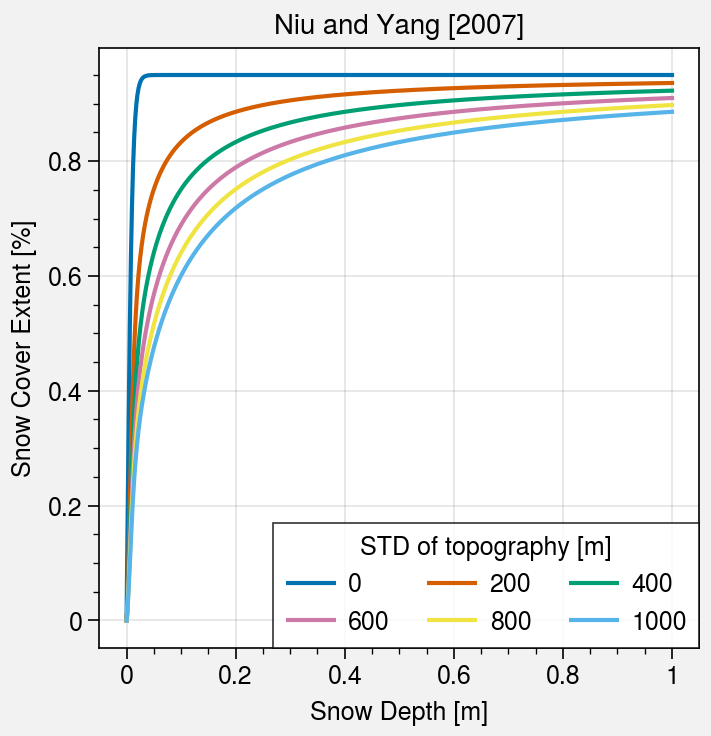

In [9]:
sigma_z_list = plot.arange(0,1000,200)

fig, axs = plot.subplots(axwidth=3)

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
    title='Niu and Yang [2007]'
)

hs = []
for sigma_z in sigma_z_list:
    y = F_R01(SWE, eps, sigma_z)
    x = SWE
    h = axs[0].plot(x, y, label=sigma_z)
    hs.append(h)

axs.legend(hs, label='STD of topography [m]')